# **CA05 PART A: Logistic Regression**

## 6070 Machine Learning
## Elizabeth Hyde

**Data Source:** Cardiovascular Disease (CVD) kills more people than cancer flobally. A dataset of real heart patients collected from a 15 year heart study cohot is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information. 



Feature definitions can be found at the following site: https://sleepdata.org/datasets/shhs/variables

In [0]:
import pandas as pd
import numpy as np 

In [0]:
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [0]:
cvd.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [0]:
cvd.describe()
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
cvd_4types      3242 non-null int64
age_s1          3242 non-null int64
race            3242 non-null int64
educat          3242 non-null int64
mstat           3242 non-null int64
hip             3242 non-null float64
neck20          3242 non-null float64
waist           3242 non-null float64
av_weight_kg    3242 non-null float64
cgpkyr          3242 non-null float64
tea15           3242 non-null int64
srhype          3242 non-null int64
parrptdiab      3242 non-null int64
bend25          3242 non-null int64
happy25         3242 non-null int64
tired25         3242 non-null int64
hlthlm25        3242 non-null int64
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


**Part 1: Build a Logistic Regression Model**

Build a binary classifier model to predict the CVD Risk (Yes/No or 1/0) using a Logistic Regression Model with the best performance possible. 


In [0]:
#make dummies for categorical variables
cvdata = pd.get_dummies(cvd, columns=['race','educat','mstat','srhype','parrptdiab','bend25','happy25','tired25','hlthlm25'], drop_first=True)

cvdata.head()


,cvd_4types,age_s1,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,race_2,race_3,educat_2,educat_3,educat_4,mstat_2,mstat_3,mstat_4,mstat_8,srhype_1,parrptdiab_1,bend25_2,bend25_3,happy25_2,happy25_3,happy25_4,happy25_5,happy25_6,tired25_2,tired25_3,tired25_4,tired25_5,tired25_6,hlthlm25_2,hlthlm25_3,hlthlm25_4,hlthlm25_5
0,0,54,110.0,40.0,108.0,87.5,34.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,56,113.0,34.0,107.0,83.5,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,54,110.0,44.5,105.0,86.2,49.5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,54,129.0,42.5,110.0,89.1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,51,122.0,37.0,113.0,81.3,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X=cvdata[['age_s1','race_2','race_3','educat_2', 'educat_3', 'educat_4','mstat_2', 'mstat_3', 'mstat_4', 'mstat_8','hip','neck20','waist','av_weight_kg','cgpkyr','tea15','srhype_1','parrptdiab_1','bend25_2', 'bend25_3','happy25_2', 'happy25_3', 'happy25_4', 'happy25_5', 'happy25_6','tired25_2', 'tired25_3', 'tired25_4', 'tired25_5', 'tired25_6','hlthlm25_2', 'hlthlm25_3', 'hlthlm25_4', 'hlthlm25_5']]
y=cvdata['cvd_4types']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 100)

In [0]:
#Build Regression Model
from sklearn import linear_model

model1 = linear_model.LogisticRegression(C=1e40, solver= 'newton-cg')
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)


**Part 2: Display Feature Importance**

Display the feature importance of all the features sorted in the order of decrreasing influence on the CVD Risk. 

In [0]:
print(model1.coef_)

[[-4.97347605e-03 -7.76999490e-01 -2.63983731e+00 -8.26672116e-02
   1.04652742e-02  1.37014532e+00 -6.60446747e-01 -4.07597196e-01
  -2.05123579e+00  1.33048765e+01 -6.76513355e-02 -4.60095644e-02
   8.41134015e-02 -2.02442508e-02  1.10742911e-03  6.78119894e-03
  -4.65602242e-03  9.88033644e-01  2.06511898e-01  1.51877101e-02
   1.84094966e-01 -8.96725812e-02 -2.01905940e-02  1.57563032e-01
  -4.62425791e-01 -1.27781674e-01 -4.08327002e-01 -1.35626838e-01
   1.16690286e-01  2.43174693e-02  1.53401641e+00  1.15864503e+00
   1.24967579e+00 -1.25311356e+00]]


In [0]:
coef = pd.DataFrame(model1.coef_)

In [0]:
coef_axis = np.swapaxes(coef, 0, 1)

coef_axis.head()

,0
0,-0.004973
1,-0.776999
2,-2.639837
3,-0.082667
4,0.010465


In [0]:
#standardize coefficients and reindex to get feature names with correct coefficients
zscores = np.std(X_train, 0)

zscores_df = pd.DataFrame(zscores)

stand_coef = zscores[0]*coef_axis[0]

stand_coef1 = pd.DataFrame(stand_coef)

stand_coef1.head(20)

new_coef = stand_coef1.set_index(keys=zscores_df.index)

new_coef.head(35)


,0
age_s1,-0.051673
race_2,-8.072760
race_3,-27.427012
educat_2,-0.858884
educat_3,0.108731
educat_4,14.235344
mstat_2,-6.861817
mstat_3,-4.234796
mstat_4,-21.311642
mstat_8,138.233140


In [0]:
#sort features into descending order

feat_coef = new_coef.sort_values(by=0 ,ascending=False)

feat_coef.head(35)

,0
mstat_8,138.233140
hlthlm25_2,15.937909
educat_4,14.235344
hlthlm25_4,12.983706
hlthlm25_3,12.037928
parrptdiab_1,10.265333
bend25_2,2.145588
happy25_2,1.912684
happy25_5,1.637026
tired25_5,1.212372


The features above are sorted in descending order (note: sign). The top 5 features in terms of the magnitude of influence on CVD risk:

1. **mstat_8**:  marital status (unknown)
2. **race_3**: race (other)
3. **mstat_4**: marital status (never married)
4. **hlthlm25_2**: How much of past 4 weeks has health limited social activities? (Most of the time)
5. **educat_4**: years of education (more than 20)


**Part 3: Evaluate Model Performance**

Evaluate the performance of the model (include ROC curve), explain the performance and draw a meaningful conclusion. 

In [0]:
# Display Confusion Matrix, Accuracy Score, Precision Score, Recall Score, F1 Score, AUC, and ROC graph
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
confusion_matrix(y_test, y_pred)

array([[219, 228],
       [ 96, 527]])

In [0]:
accuracy_score(y_test, y_pred)

0.697196261682243

In [0]:
precision_score(y_test, y_pred)

0.6980132450331126

In [0]:
recall_score(y_test, y_pred)

0.8459069020866774

In [0]:
f1_score(y_test, y_pred)

0.7648766328011611

In [0]:
roc_auc_score(y_test, y_pred)

0.6679198939963589

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.49      0.57       447
           1       0.70      0.85      0.76       623

    accuracy                           0.70      1070
   macro avg       0.70      0.67      0.67      1070
weighted avg       0.70      0.70      0.69      1070



**Display ROC graph**

In [0]:
from sklearn import metrics

y_probs = model1.predict_proba(X_test)
y_preds = y_probs[:,1]

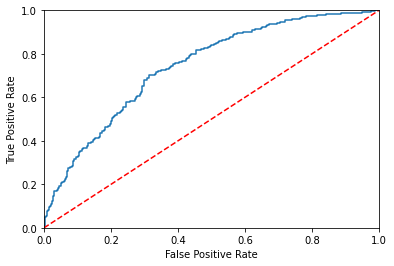

In [0]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_preds)


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()